# Happiness and Freedom of Movement

### An examination of how reported happiness correlates to personal and economic freedom.

###### Analysis derived from data using the most recent World Happiness Report and Human Freedom Index.

### Statements to consider

##### General

* Freedom is positively correlated with Happiness.

##### Personal freedom of movement with relation to geographic isolation

* People in land-locked countries are less happy than others considering all other factors.

##### Happiness with relation to religious and gender freedom (personal freedom of movement)

* People in countries with reduced religious freedom and women's moveement are less happy than others.


In [1]:
# imports

import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sqlalchemy as sa

# create sqlite database and path

from sqlalchemy import create_engine
engine = create_engine('sqlite:///Happiness_Freedom.db')

# set seaborn default theme

sns.set()

# multiple outputs from single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [29]:
# create dataframe from csv

hfi_file = pd.read_csv("hfi_cc_2018.csv")

whr_file = pd.read_csv("whr_2017.csv")

hfi = pd.DataFrame(hfi_file)

whr = pd.DataFrame(whr_file)

# create database and tables from dataframe (database and table have been previously created using this code)

# hfi.to_sql("Human Freedom Index", con=engine)
# whr.to_sql("World Happiness Report", con=engine)

# pull data from database to confirm successful creation

hfi_head = "SELECT * FROM 'Human Freedom Index' LIMIT 5"

whr_head = "SELECT * FROM 'World Happiness Report' LIMIT 5"

# Display head of each table

# pd.read_sql(hfi_head, con=engine)

# pd.read_sql(whr_head, con=engine)

In [3]:
# Overview of Human Freedom Index data

hfi.info()
hfi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Columns: 123 entries, year to hf_quartile
dtypes: float64(119), int64(1), object(3)
memory usage: 1.4+ MB


,year,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
count,1458.000000,880.000000,880.000000,880.000000,1378.000000,1378.000000,1369.000000,1378.000000,1279.000000,1378.000000,...,1283.000000,1357.000000,1368.000000,1374.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,5.589355,5.474770,5.044070,5.309641,7.412980,8.341855,9.519458,6.772869,9.584972,...,4.886192,7.698494,6.981858,6.317668,7.019782,6.785610,76.973149,6.993444,77.007983,2.490566
std,2.582875,2.080957,1.428494,1.724886,1.529310,2.832947,3.225902,1.744673,2.768983,1.559826,...,1.889168,1.728507,1.979200,1.230988,1.027625,0.883601,44.540142,1.025811,44.506549,1.119698
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.009841,2.483540,2.880000,1.000000,3.765827,1.000000,1.000000
25%,2010.000000,4.133333,4.549550,3.789724,4.131746,6.386978,10.000000,10.000000,5.000000,9.942607,...,3.433786,6.874687,6.368178,5.591851,6.429498,6.250000,38.000000,6.336685,39.000000,1.000000
50%,2012.000000,5.300000,5.300000,4.575189,4.910797,8.638278,10.000000,10.000000,7.500000,10.000000,...,4.418371,8.074161,7.466692,6.265234,7.082075,6.900000,77.000000,6.923840,76.000000,2.000000
75%,2014.000000,7.389499,6.410975,6.400000,6.513178,9.454402,10.000000,10.000000,10.000000,10.000000,...,6.227978,8.991882,8.209310,7.139718,7.720955,7.410000,115.000000,7.894660,115.000000,3.000000
max,2016.000000,9.700000,8.773533,8.719848,8.723094,9.926568,10.000000,10.000000,10.000000,10.000000,...,9.623811,9.999638,9.865488,9.272600,9.439828,9.190000,162.000000,9.126313,162.000000,4.000000


In [31]:
# list all columns

# list(hfi.columns.values)

# get columns with null or nan values

# hfi.isna()

# hfi.notna()

In [5]:
# fill all columns with missing values

hfinotnull = hfi.dropna()

hfinotnull

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile


In [111]:
# create abstract function for matplot lib figures and axes for scatter plots

def scatterPlot(plotName, x_axis, x_label, y_axis, y_label, c_label, c_value, cmap_value):
    fig, ax = plt.subplots(figsize=(15, 5))
    plotName = ax.scatter(x=x_axis, y=y_axis, c=c_value, cmap=cmap_value)
    cbar = fig.colorbar(plotName, ax=ax)
    cbar.set_label(c_label)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
scatterPlot
    
def hexbinPlot(plotName, x_axis, x_label, y_axis, y_label, gridsize):
    fig, ax = plt.subplots(figsize=(15, 5))
    plotName = ax.hexbin(x=x_axis, y=y_axis, gridsize=gridsize)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    
hexbinPlot

<function __main__.scatterPlot(plotName, x_axis, x_label, y_axis, y_label, c_label, c_value, cmap_value)>

<function __main__.hexbinPlot(plotName, x_axis, x_label, y_axis, y_label, gridsize)>

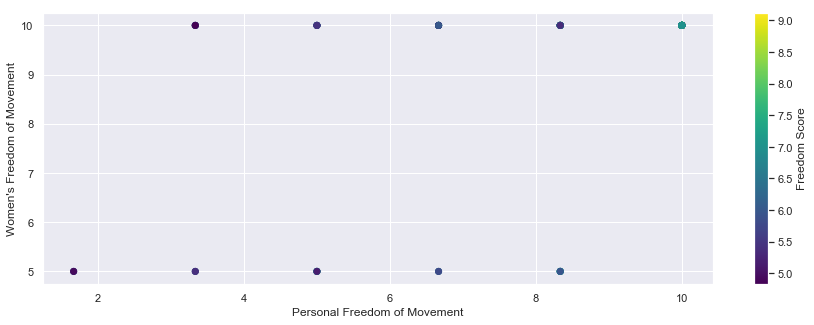

In [91]:
hfi_movement_data = "SELECT hf_score, pf_movement, pf_movement_women FROM 'Human Freedom Index' GROUP BY countries ORDER BY pf_score DESC"

hfi_test = pd.read_sql(hfi_movement_data, con=engine)

# hfi_test

scatterPlot(plotName=hfi_test, x_axis=hfi_test["pf_movement"], x_label="Personal Freedom of Movement", y_axis=hfi_test["pf_movement_women"], y_label="Women's Freedom of Movement", c_label="Freedom Score", c_value=hfi_test["hf_score"], cmap_value="viridis")


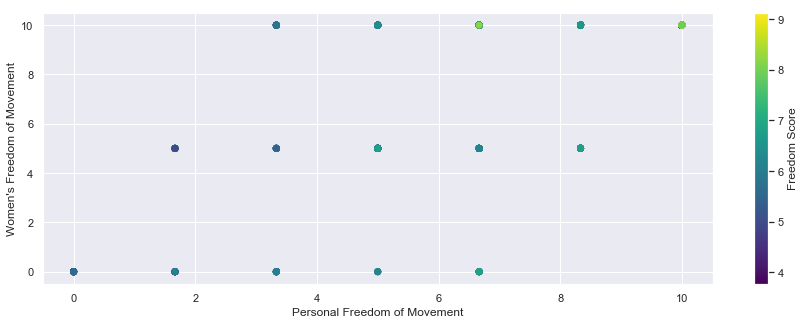

In [92]:
# examine correlation between freedome of movement and women's freedom of movement colored by the country's human freedome score over all countries

# hfi.plot.scatter(x="pf_movement", y="pf_movement_women", c="hf_score", colormap=("viridis"))

scatterPlot(plotName="hfi_movement", x_axis=hfi["pf_movement"], x_label="Personal Freedom of Movement", y_axis=hfi["pf_movement_women"], y_label="Women's Freedom of Movement", c_label="Freedom Score", c_value=hfi["hf_score"], cmap_value="viridis")

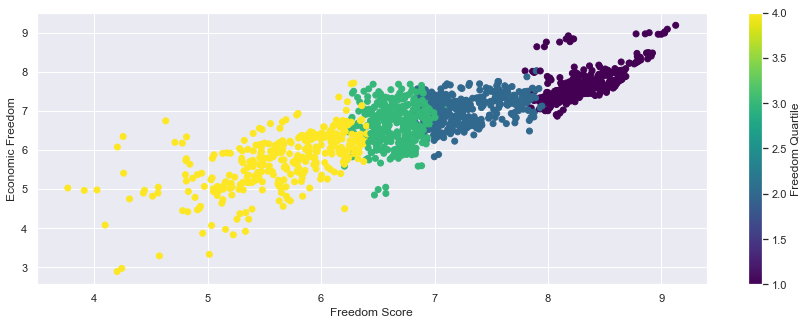

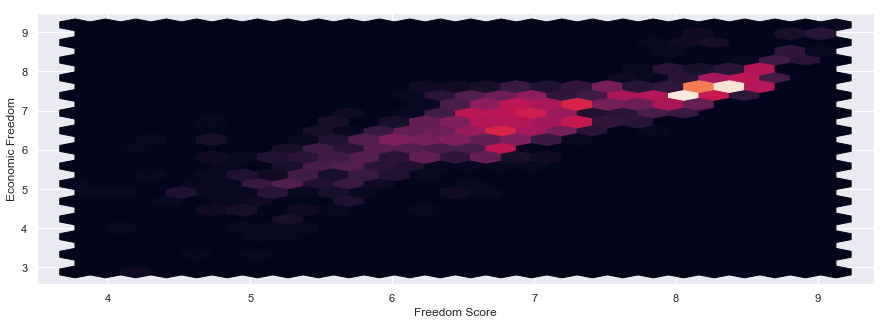

In [112]:
# examine correlation between human freedom score and economic freedom score

# colored by human freedom quartile (higher being lower value quartile)
# hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="hf_quartile", cmap="viridis")

scatterPlot(plotName="hf_ef", x_axis=hfi["hf_score"], x_label="Freedom Score", y_axis=hfi["ef_score"], y_label="Economic Freedom", c_label="Freedom Quartile", c_value=hfi["hf_quartile"], cmap_value="viridis")

# # same as above in hexbin format
# hfi.plot.hexbin(x='hf_score', y='ef_score', gridsize=25)

hexbinPlot(plotName="hf_ef_hexbin", x_axis=hfi["hf_score"], x_label="Freedom Score", y_axis=hfi["ef_score"], y_label="Economic Freedom", gridsize=25)

# # colored by personal freedom of movement score
# hfi.plot(kind="scatter", x="hf_score", y="ef_score", c="pf_movement", cmap="viridis")

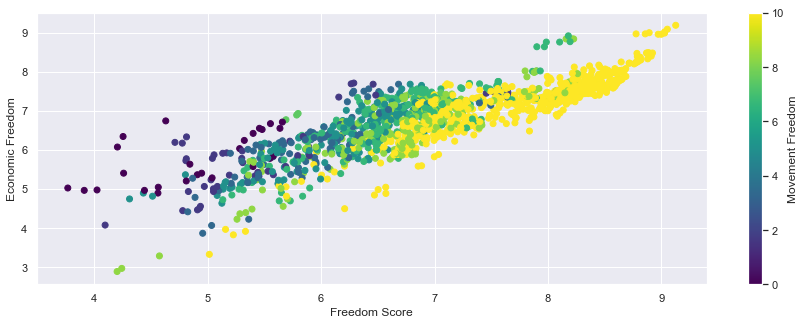

In [113]:
# inidividual examination of human freedom and economic freedome colored by personal freedome of movement

scatterPlot(plotName="hf_ef_pf", x_axis=hfi["hf_score"], x_label="Freedom Score", y_axis=hfi["ef_score"], y_label="Economic Freedom", c_label="Movement Freedom", c_value=hfi["pf_movement"], cmap_value="viridis")

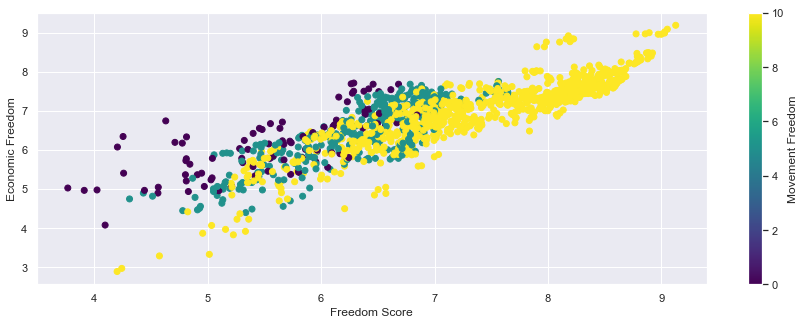

In [115]:
# examination as above but colored by women's personal freedome of movement (similar correlation)

scatterPlot(plotName="hf_ef_pf_w", x_axis=hfi["hf_score"], x_label="Freedom Score", y_axis=hfi["ef_score"], y_label="Economic Freedom", c_label="Movement Freedom", c_value=hfi["pf_movement_women"], cmap_value="viridis")


hf_score                                                            \
             count     mean std      min      25%      50%      75%      max   
countries                                                                      
Albania        1.0  7.56814 NaN  7.56814  7.56814  7.56814  7.56814  7.56814   

          pf_movement           ...                      pf_movement_women  \
                count      mean ...        75%       max             count   
countries                       ...                                          
Albania           1.0  6.666667 ...   6.666667  6.666667               1.0   

                                             
          mean std  min  25%  50%  75%  max  
countries                                    
Albania    5.0 NaN  5.0  5.0  5.0  5.0  5.0  

[1 rows x 24 columns]

countries
Albania    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

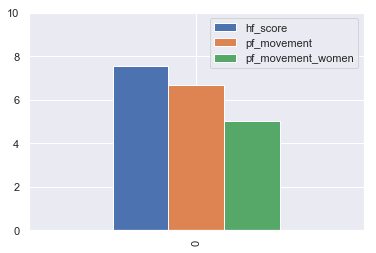

In [11]:
# bar chart of movement and overall freedom scores for Albania

albania = hfi.head(1).groupby("countries")["hf_score", "pf_movement", "pf_movement_women"]

albania.describe()

albania.plot(kind="bar", xlim=(0,10), ylim=(0,10))

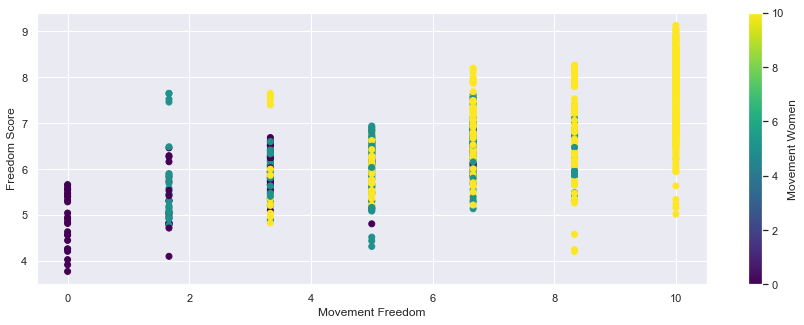

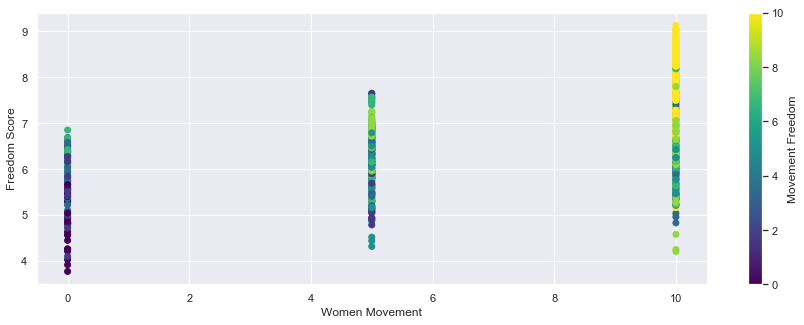

In [118]:
# visualize correlation between movement freedom and overall freedom colored by women's personal freedom of movmeent

scatterPlot(plotName="hf_movement_all", x_axis=hfi["pf_movement"], x_label="Movement Freedom", y_axis=hfi["hf_score"], y_label="Freedom Score", c_label="Movement Women", c_value=hfi["pf_movement_women"], cmap_value="viridis")

# visualize correlation between womens' movement freedom and overall freedom

# hfi.plot(kind="scatter", x="pf_movement_women", y="hf_score", c="pf_movement", cmap="viridis")

scatterPlot(plotName="pf_movement_all", x_axis=hfi["pf_movement_women"], x_label="Women Movement", y_axis=hfi["hf_score"], y_label="Freedom Score", c_label="Movement Freedom", c_value=hfi["pf_movement"], cmap_value="viridis")


In [13]:
# get list of land locked countries

land_locked_countries = pd.Series(["Afghanistan", "Andorra", "Armenia", "Artsakh", "Austria", "Azerbaijan", "Belarus", "Bhutan", "Bolivia", "Botswana", "Burkina Faso", "Burundi", "Central African Republic", "Chad", "Czech Republic", "Ethiopia", "Hungary","Kazakhstan", "Kosovo", "Kyrgyzstan", "Laos", "Lesotho", "Liechtenstein", "Luxembourg", "Macedonia", "Malawi", "Mali", "Moldova", "Mongolia", "Nepal", "Niger", "Paraguay", "Rwanda", "San Marino" , "Serbia", "Slovakia", "South Ossetia", "South Sudan", "Swaziland", "Switzerland","Tajikistan", "Transnistria", "Turkmenistan", "Uganda", "Uzbekistan","Vatican City", "West Bank", "Zambia", "Zimbabwe"])
land_locked_countries.head()

0    Afghanistan
1        Andorra
2        Armenia
3        Artsakh
4        Austria
dtype: object

In [14]:
# list non land locked countries

nll_happiness = hfi.loc[~hfi["countries"].isin(land_locked_countries)]

nll_rank = nll_happiness.groupby("countries")["pf_movement"]

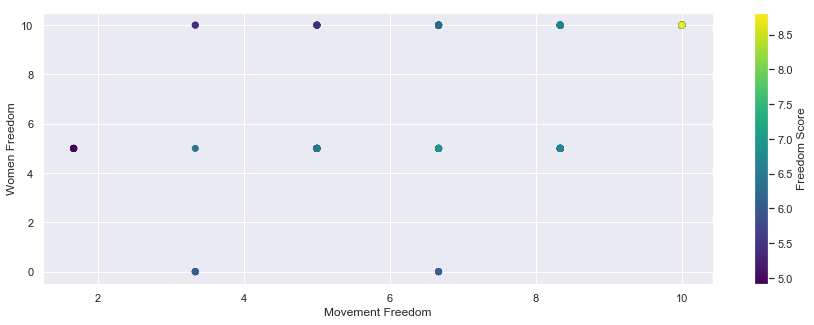

In [125]:
# select only land locked countries from dataframe (ref: https://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas)

llh = hfi.loc[hfi['countries'].isin(land_locked_countries)]

# land_locked_happiness.describe()

# list land locked countries by movement freedom rank

llc_rank = land_locked_happiness.groupby("countries")[["pf_movement"]].mean()

# llc_rank.sort_values("pf_movement", ascending=False)

# llh.plot(kind="scatter", x="pf_movement", y="pf_movement_women", c="hf_score", cmap="viridis")

scatterPlot(plotName="land_locked", x_axis=llh["pf_movement"], x_label="Movement Freedom", y_axis=llh["pf_movement_women"], y_label="Women Freedom", c_label="Freedom Score", c_value=llh["hf_score"], cmap_value="viridis")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002610C08F550>]],
      dtype=object)

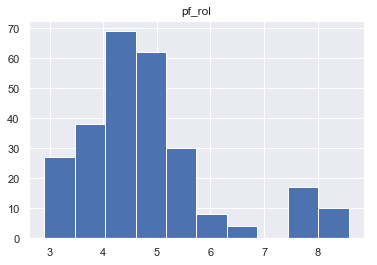

In [16]:
land_locked_happiness.hist(column="pf_rol")

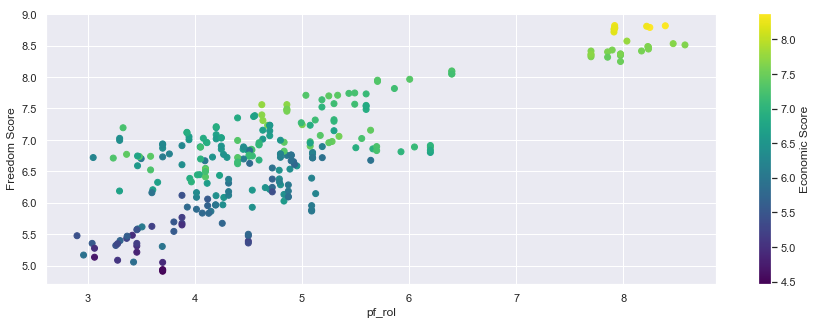

In [126]:
# llh.plot(x="pf_rol", y="hf_score", kind="scatter", c="ef_score", cmap="viridis")

scatterPlot(plotName="land_locked", x_axis=llh["pf_rol"], x_label="pf_rol", y_axis=llh["hf_score"], y_label="Freedom Score", c_label="Economic Score", c_value=llh["ef_score"], cmap_value="viridis")
